In [1]:
import numpy as np
import matplotlib.pyplot as pp
from scipy.integrate import solve_ivp

In [2]:
def simple(t,y):
    return -y

sol = solve_ivp(simple, (0,1000), [2])
#print(sol)

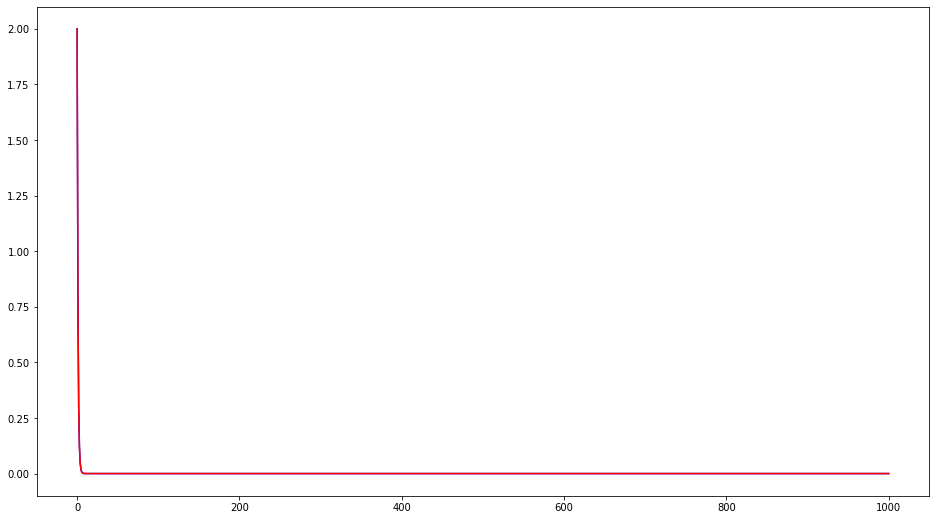

In [3]:
pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0], 'b-', sol.t, 2.0*np.exp(-sol.t), 'r-')

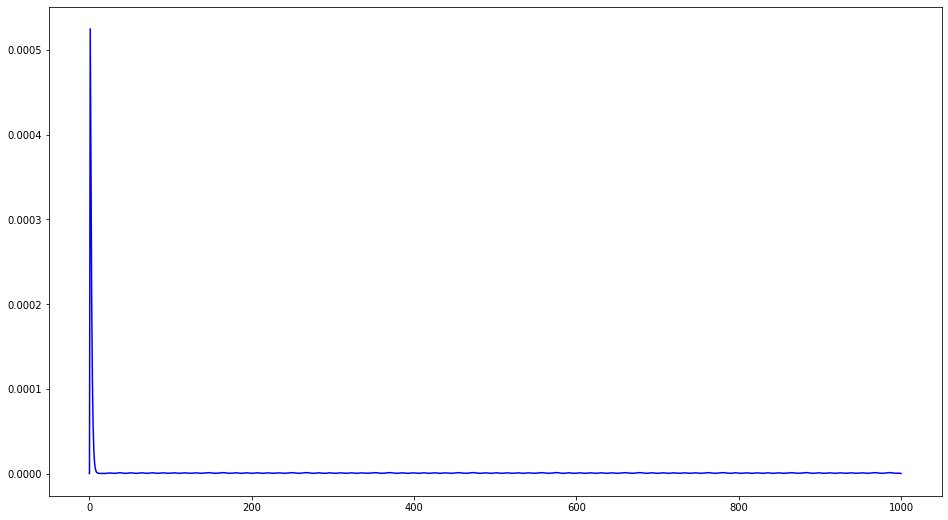

In [4]:
pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0] - 2.0*np.exp(-sol.t), 'b-')

/var/folders/h9/zyy6vvp148z33m8r4pw6f1k00000gn/T/ipykernel_92018/2913286601.py:2: RuntimeWarning: divide by zero encountered in true_divide
  pp.plot(sol.t, (sol.y[0] - 2.0*np.exp(-sol.t))/(2.0*np.exp(-sol.t)), 'b-')
/var/folders/h9/zyy6vvp148z33m8r4pw6f1k00000gn/T/ipykernel_92018/2913286601.py:2: RuntimeWarning: overflow encountered in true_divide
  pp.plot(sol.t, (sol.y[0] - 2.0*np.exp(-sol.t))/(2.0*np.exp(-sol.t)), 'b-')


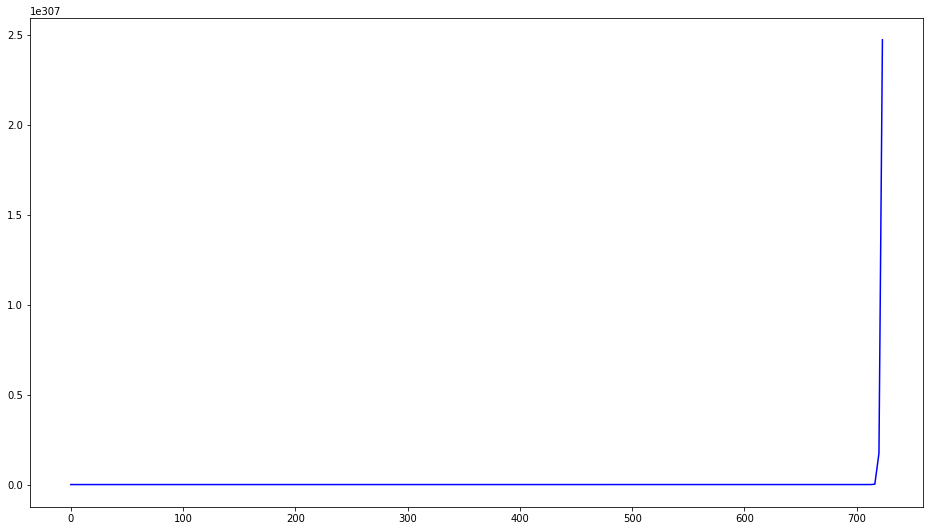

In [5]:
pp.figure(figsize=(16,9))
pp.plot(sol.t, (sol.y[0] - 2.0*np.exp(-sol.t))/(2.0*np.exp(-sol.t)), 'b-')

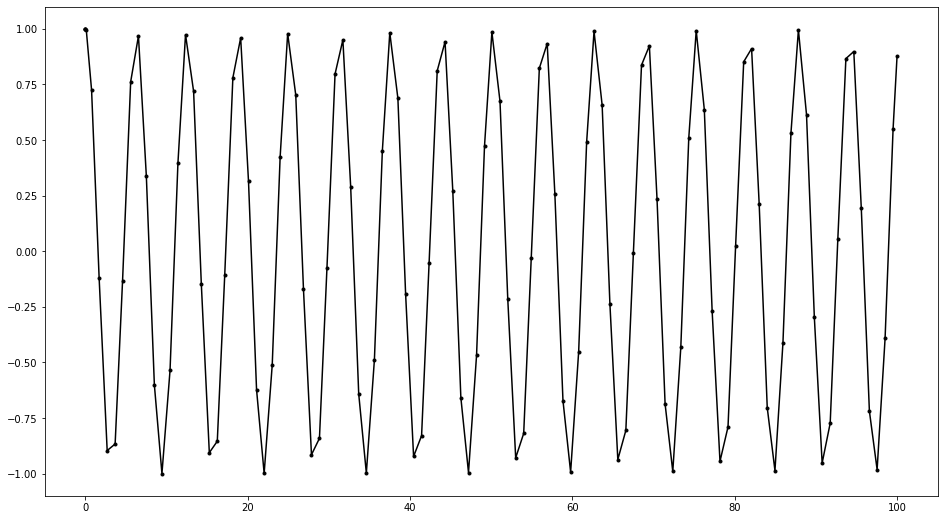

In [6]:
def osc(t,y):
    return [y[1], -y[0]]

sol = solve_ivp(osc, (0,100), [1,0])

pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0], 'k.-')

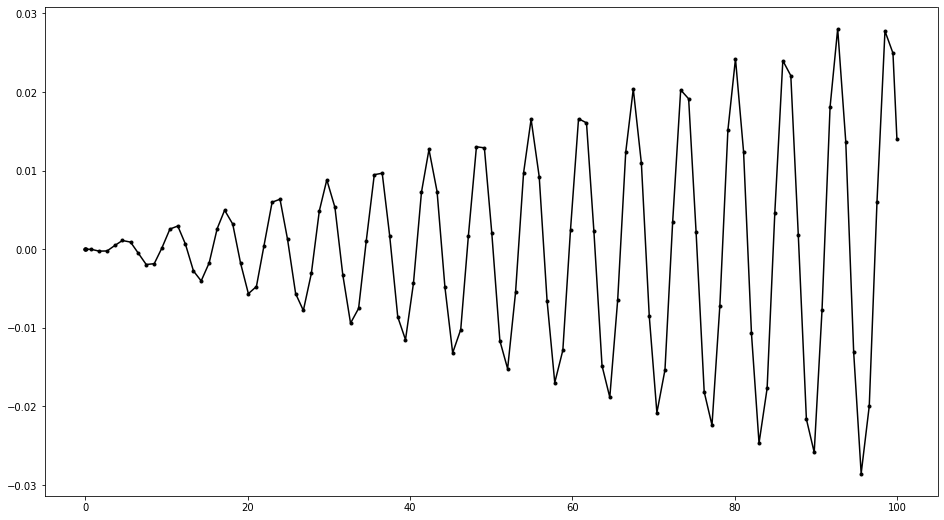

In [7]:
pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0]-np.cos(sol.t), 'k.-')

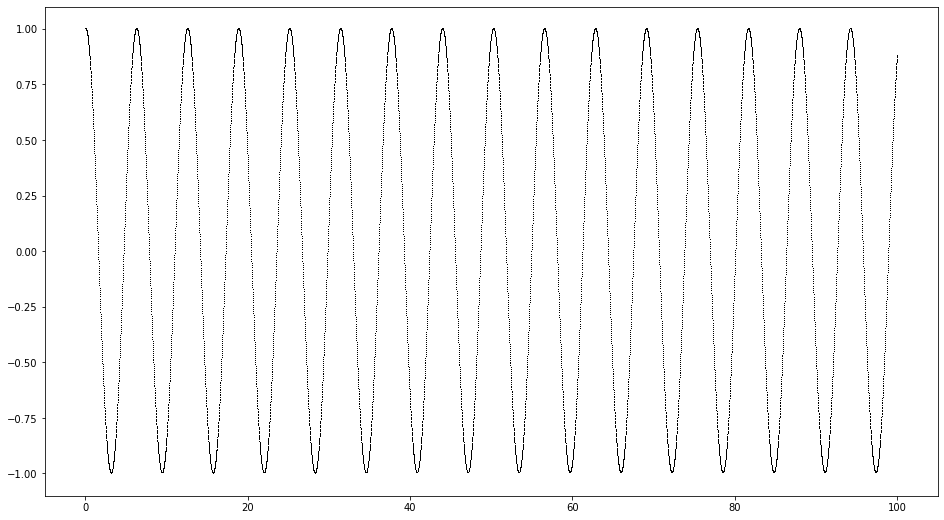

In [8]:
def osc(t,y):
    return [y[1], -y[0]]

sol = solve_ivp(osc, (0,100), [1,0], t_eval=np.linspace(0,100,10000))

pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0], 'k,')

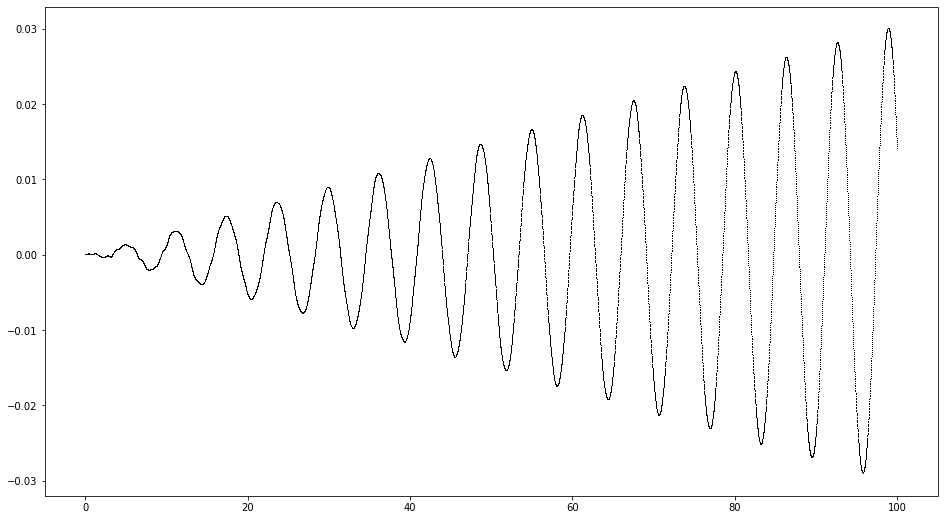

In [9]:
pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0]-np.cos(sol.t), 'k,')

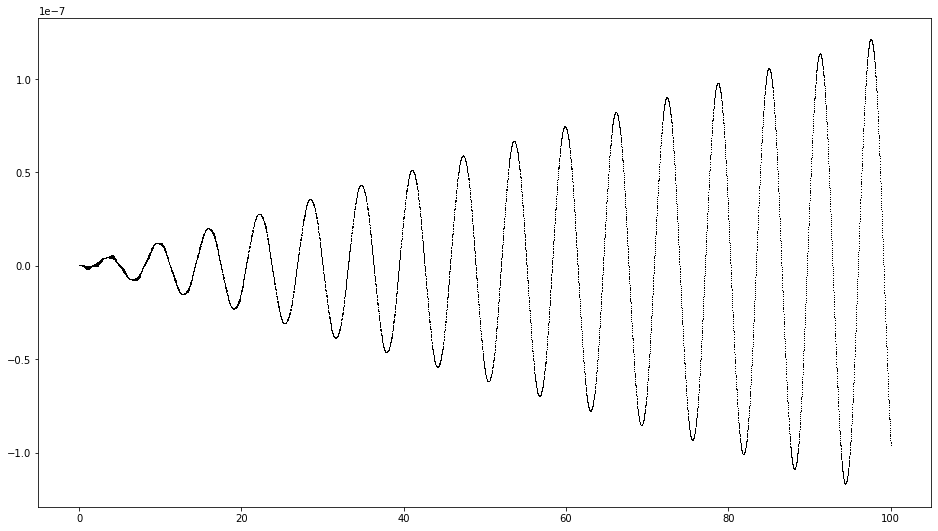

In [10]:
def osc(t,y):
    return [y[1], -y[0]]

sol = solve_ivp(osc, (0,100), [1,0], t_eval=np.linspace(0,100,10000), method='RK45', rtol=1e-8, atol=1e-12)

pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0]-np.cos(sol.t), 'k,')

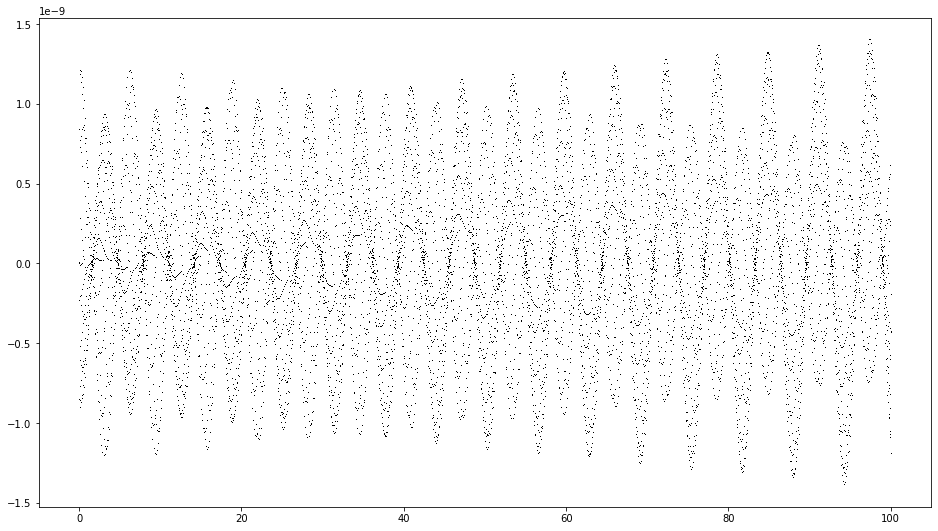

In [11]:
def osc(t,y):
    return [y[1], -y[0]]

sol = solve_ivp(osc, (0,100), [1,0], t_eval=np.linspace(0,100,10000), method='Radau', rtol=1e-8, atol=1e-12)

pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0]-np.cos(sol.t), 'k,')

In [37]:
def vdp(t,y):
    return [y[1], 10*(1-y[0]**2)*y[1] - y[0] + np.sin(2*np.pi*t/40)]

sol1 = solve_ivp(vdp, (0,10000), [1,0], t_eval=np.linspace(0,10000,100000), method='RK45', rtol=1e-3, atol=1e-6)
sol2 = solve_ivp(vdp, (0,10000), [1,0], t_eval=np.linspace(0,10000,100000), method='Radau', rtol=1e-3, atol=1e-6)

(8500.0, 9000.0)

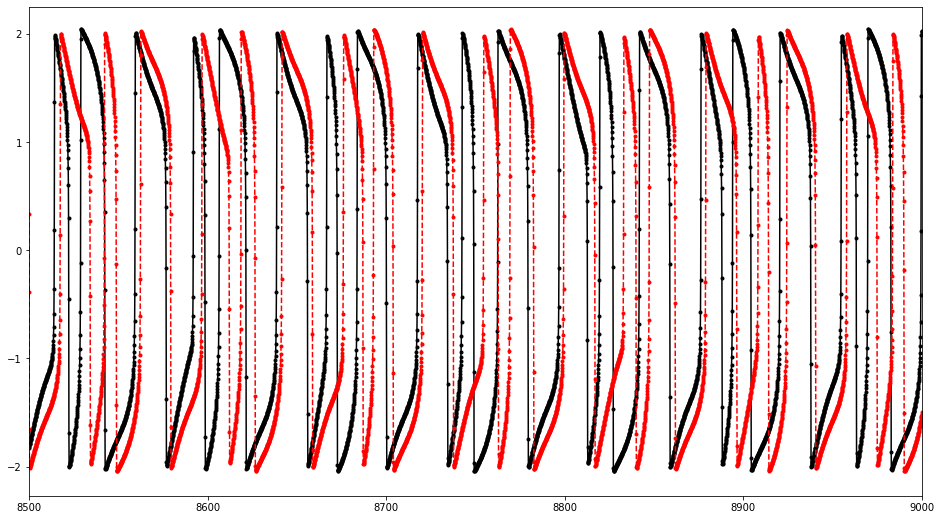

In [38]:
pp.figure(figsize=(16,9))
pp.plot(sol1.t, sol1.y[0], 'k.-', sol2.t, sol2.y[0], 'r.--')
pp.xlim([8500,9000])

(-10.0, 10.0)

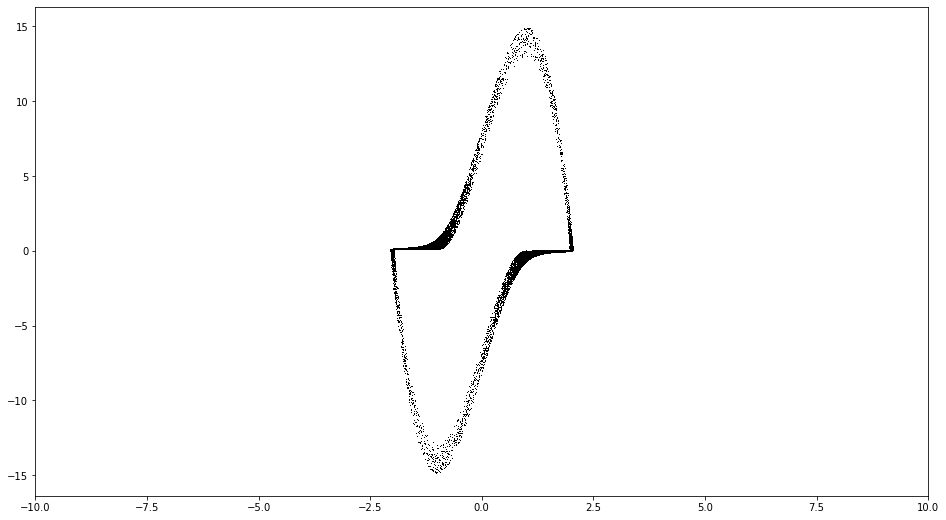

In [39]:
pp.figure(figsize=(16,9))
pp.plot(sol1.y[0], sol1.y[1], 'k,')
pp.xlim([-10,10])

In [2]:
def vdp(t,y,mu=10,per=40):
    return [y[1], mu*(1-y[0]**2)*y[1] - y[0] + np.sin(2*np.pi*t/per)]

sol = solve_ivp(vdp, (0,10000), [1,0], args=[5,20], t_eval=np.linspace(0,10000,100000), method='RK45', rtol=1e-4, atol=1e-8)

(-10.0, 10.0)

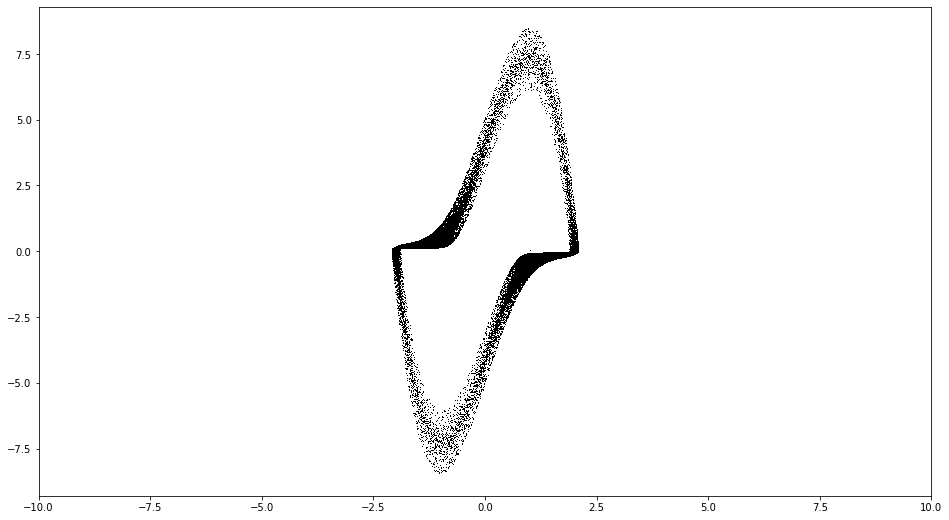

In [3]:
pp.figure(figsize=(16,9))
pp.plot(sol.y[0], sol.y[1], 'k,')
pp.xlim([-10,10])

(4500.0, 5000.0)

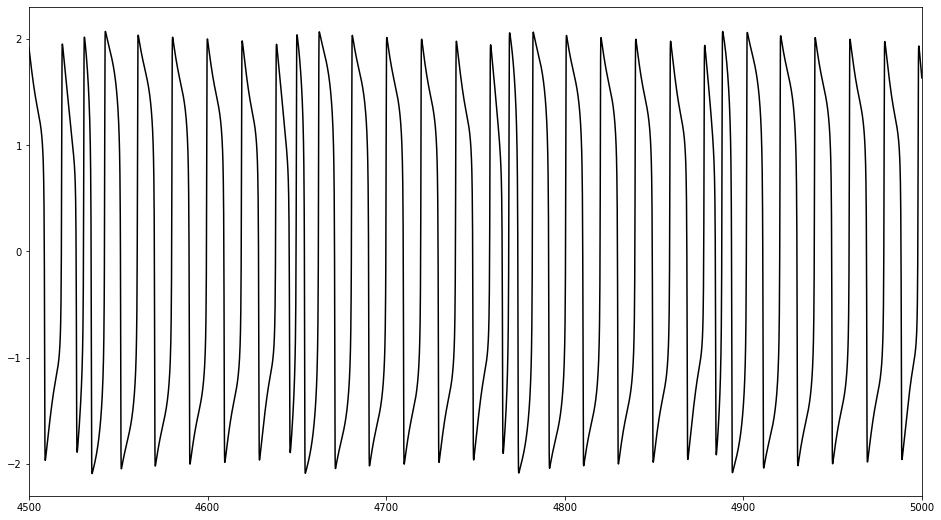

In [60]:
pp.figure(figsize=(16,9))
pp.plot(sol.t, sol.y[0], 'k-')
pp.xlim([4500,5000])

In [66]:
def vdp(t,y,mu=10,per=40):
    return [y[1], mu*(1-y[0]**2)*y[1] - y[0] + np.sin(2*np.pi*t/per)]

plist = np.logspace(np.log10(5),np.log10(50),9)
sols = [solve_ivp(vdp, (0,10000), [1,0], args=[5,p], t_eval=np.linspace(0,10000,100000), method='RK45', rtol=1e-4, atol=1e-8) for p in plist]

ValueError: num must be 1 <= num <= 9, not 0

<Figure size 1152x720 with 0 Axes>

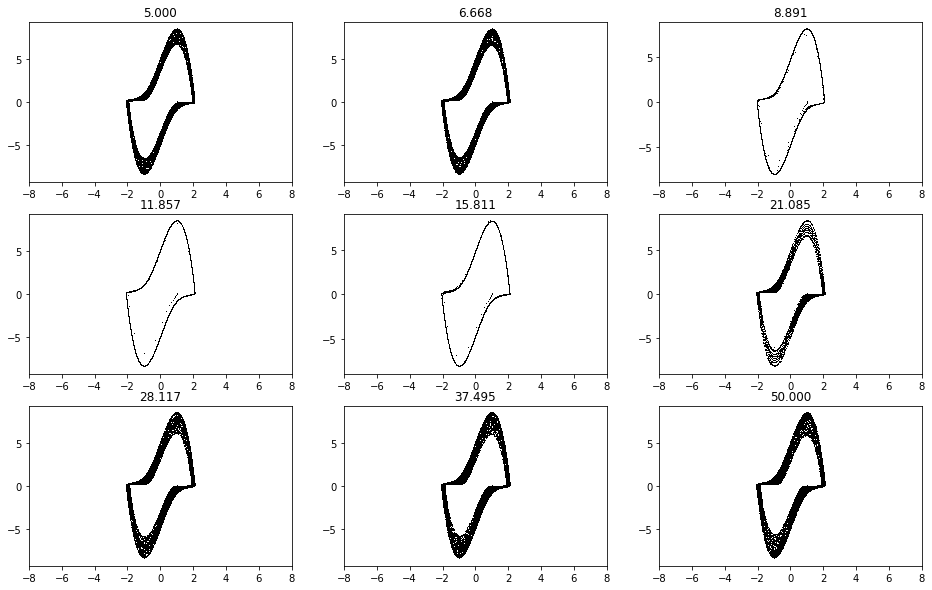

In [67]:
pp.figure(figsize=(16,10))
for i in range(3):
    for j in range(3):
        pp.subplot(3,3,j+i*3+1)
        pp.plot(sols[j+i*3].y[0], sols[j+i*3].y[1], 'k,')
        pp.title(f'{plist[j+i*3]:.3f}')
        pp.xlim([-8,8])

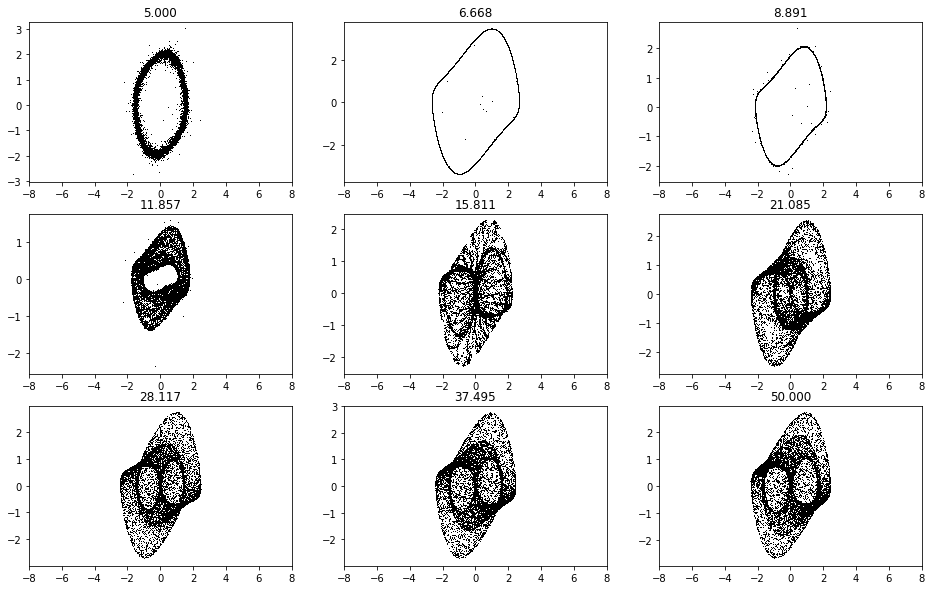

In [8]:
plist = np.logspace(np.log10(5),np.log10(50),9)
sols = [solve_ivp(vdp, (0,10000), [1,0], args=[0.5,p], t_eval=np.linspace(0,10000,10000), method='RK45', rtol=1e-3, atol=1e-6) for p in plist]

pp.figure(figsize=(16,10))
for i in range(3):
    for j in range(3):
        pp.subplot(3,3,j+i*3+1)
        pp.plot(sols[j+i*3].y[0], sols[j+i*3].y[1], 'k,')
        pp.title(f'{plist[j+i*3]:.3f}')
        pp.xlim([-8,8])